In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import functions as fns

# importing packages that will allow us to set visual params for our plots
from matplotlib import rc

import seaborn.objects as so

from seaborn import axes_style


In [2]:
# GRABBING API KEY FROM TEXT FILE
def get_api_key(txt_file, key_loc):
    '''
    Purpose is to go into a txt file and grab the EIA API Key needed to make data requests
    '''
    with open(txt_file, 'r') as f:
        lines = f.readlines()
        api_key = lines[key_loc]
        print('successfully grabbed you API Key')

        return api_key
    
# checking that our API Key is printing correctly
api_key = get_api_key(txt_file='eia_api_key.txt', key_loc=1)

# print(api_key)

successfully grabbed you API Key


storing all series ids that we are interested in
    X-Params: {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "seriesId": [
            "BALIT",
            "NGACPUS",
            "NGBGPUS",
            "NGCHCGW_US",
            "NGCOPUS",
            "NGEPCGW_US",
            "NGEPCNS_CA",
            "NGEPCNS_FL",
            "NGEPCNS_HA",
            "NGEPCNS_MW",
            "NGEPCNS_NE",
            "NGEPCNS_NW",
            "NGEPCNS_NY",
            "NGEPCNS_PJ",
            "NGEPCNS_SE",
            "NGEPCNS_SP",
            "NGEPCNS_SW",
            "NGEPCNS_TX",
            "NGEPCNS_US",
            "NGEPCON",
            "NGEPGEN_CA",
            "NGEPGEN_FL",
            "NGEPGEN_HA",
            "NGEPGEN_MW",
            "NGEPGEN_NE",
            "NGEPGEN_NW",
            "NGEPGEN_NY",
            "NGEPGEN_PJ",
            "NGEPGEN_SE",
            "NGEPGEN_SP",
            "NGEPGEN_SW",
            "NGEPGEN_TX",
            "NGEPGEN_US",
            "NGEPSHR_US",
            "NGEPTOT",
            "NGEUDUS",
            "NGEXPUS",
            "NGEXPUS_LNG",
            "NGEXPUS_PIPE",
            "NGHHMCF",
            "NGHHUUS",
            "NGIMPUS",
            "NGIMPUS_LNG",
            "NGIMPUS_PIPE",
            "NGINCNS_US",
            "NGINGEN_US",
            "NGINX",
            "NGINX_ENC",
            "NGINX_ESC",
            "NGINX_MAC",
            "NGINX_MTN",
            "NGINX_NEC",
            "NGINX_PAC",
            "NGINX_SAC",
            "NGINX_US",
            "NGINX_WNC",
            "NGINX_WSC",
            "NGMP48NGOM",
            "NGMPPGLF",
            "NGMPPUS",
            "NGNIPUS",
            "NGNWPUS",
            "NGPRPUS",
            "NGPSUPP",
            "NGSUPP",
            "NGTCCO2",
            "NGTCPUS",
            "NGTOGEN_US",
            "NGTOPUS",
            "NGUSPUS",
            "NGWGPUS",
            "NGWG_AK",
            "NGWG_EAST",
            "NGWG_MTN",
            "NGWG_MW",
            "NGWG_PAC",
            "NGWG_SC"
        ]
    },
    "start": null,
    "end": null,
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

In [3]:
# this section is dedicated to analyzing anything natural gas and electricity
natgas_elecs = ["NGEPCGW_US",
                "NGEPCNS_CA",
                "NGEPCNS_FL",
                "NGEPCNS_HA",
                "NGEPCNS_MW",
                "NGEPCNS_NE",
                "NGEPCNS_NW",
                "NGEPCNS_NY",
                "NGEPCNS_PJ",
                "NGEPCNS_SE",
                "NGEPCNS_SP",
                "NGEPCNS_SW",
                "NGEPCNS_TX",
                "NGEPCNS_US",
                "NGEPCON",
                "NGEPGEN_CA",
                "NGEPGEN_FL",
                "NGEPGEN_HA",
                "NGEPGEN_MW",
                "NGEPGEN_NE",
                "NGEPGEN_NW",
                "NGEPGEN_NY",
                "NGEPGEN_PJ",
                "NGEPGEN_SE",
                "NGEPGEN_SP",
                "NGEPGEN_SW",
                "NGEPGEN_TX",
                "NGEPGEN_US",
                "NGEPSHR_US",
                "NGEPTOT",
                "NGEUDUS"]


# setting up a start date
start = '2010-01'

# creating a save path for our data
save_date = datetime.date.today().strftime("%Y_%m")

# where we will be storing our data
save_path = f'output/naturalgas/natgas_elecs_steo_data_{save_date}.csv'

ng_elecs_df = fns.series_to_dataframe(series_list=natgas_elecs, start_date=start, 
                              save_path=save_path, key=api_key)

print(ng_elecs_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period             5952 non-null   datetime64[ns]
 1   seriesId           5952 non-null   object        
 2   seriesDescription  5952 non-null   object        
 3   value              5952 non-null   float64       
 4   unit               5952 non-null   object        
 5   forecast_period    5952 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 279.1+ KB
None


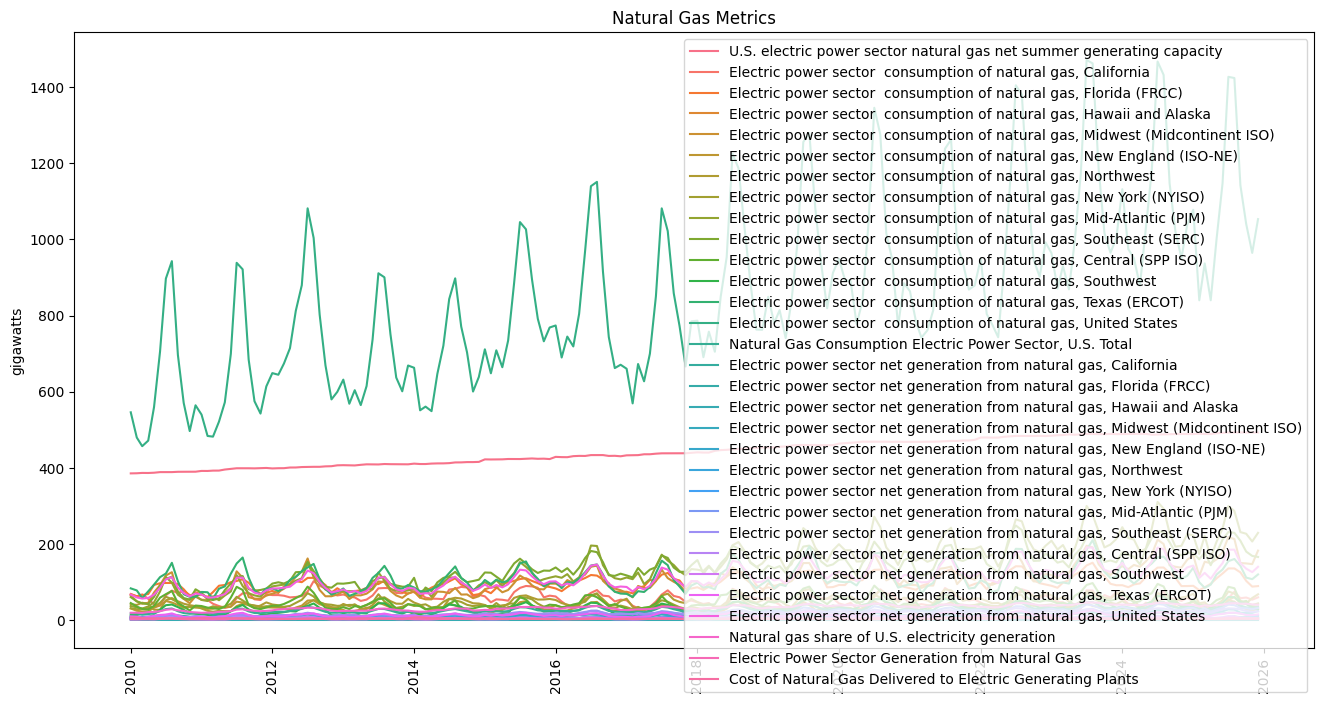

In [7]:
# checking our our data
fns.gimme_lineplot(dataframe=ng_elecs_df, 
               title='Natural Gas Metrics')

KeyError: 0

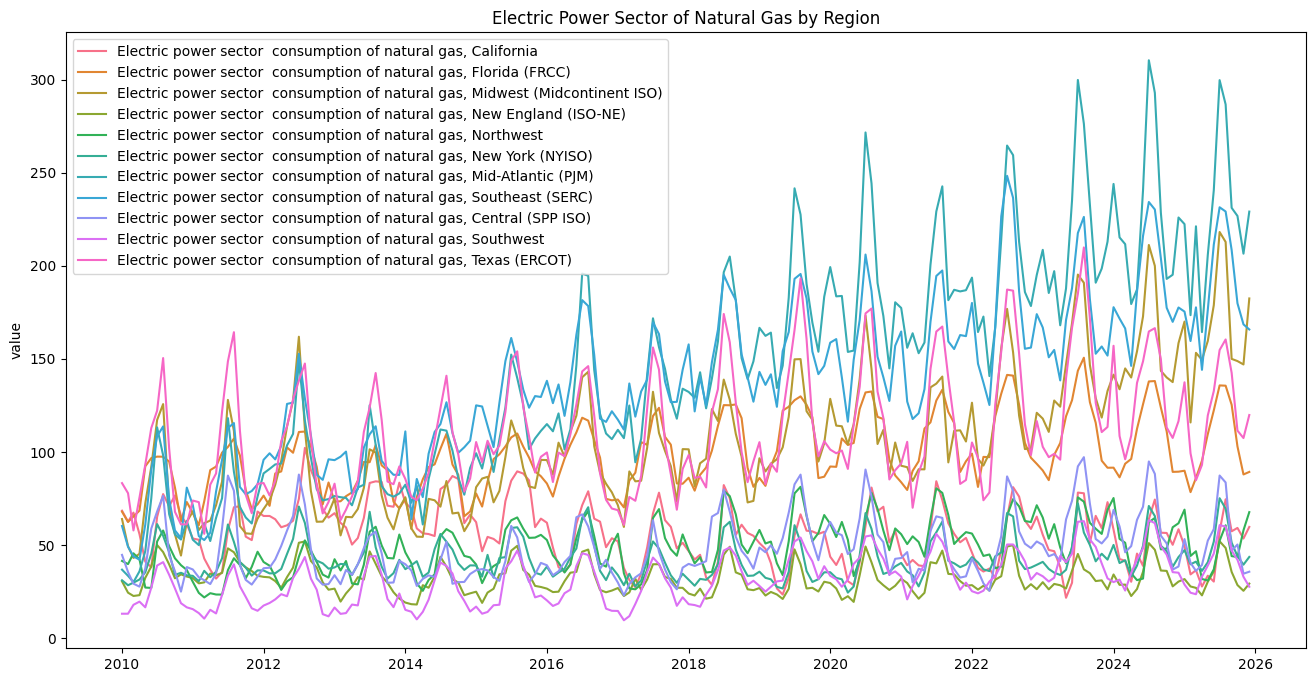

In [10]:
# only looking at electric power section consumption of natural gas
elec_cons_ng = [
            "NGEPCNS_CA",
            "NGEPCNS_FL",
            "NGEPCNS_MW",
            "NGEPCNS_NE",
            "NGEPCNS_NW",
            "NGEPCNS_NY",
            "NGEPCNS_PJ",
            "NGEPCNS_SE",
            "NGEPCNS_SP",
            "NGEPCNS_SW",
            "NGEPCNS_TX",
        ]

elec_cons_ng_df = ng_elecs_df[ng_elecs_df['seriesId'].isin(elec_cons_ng)]

# checking our our data
fns.gimme_lineplot(dataframe=elec_cons_ng_df, 
               title='Electric Power Sector of Natural Gas by Region')

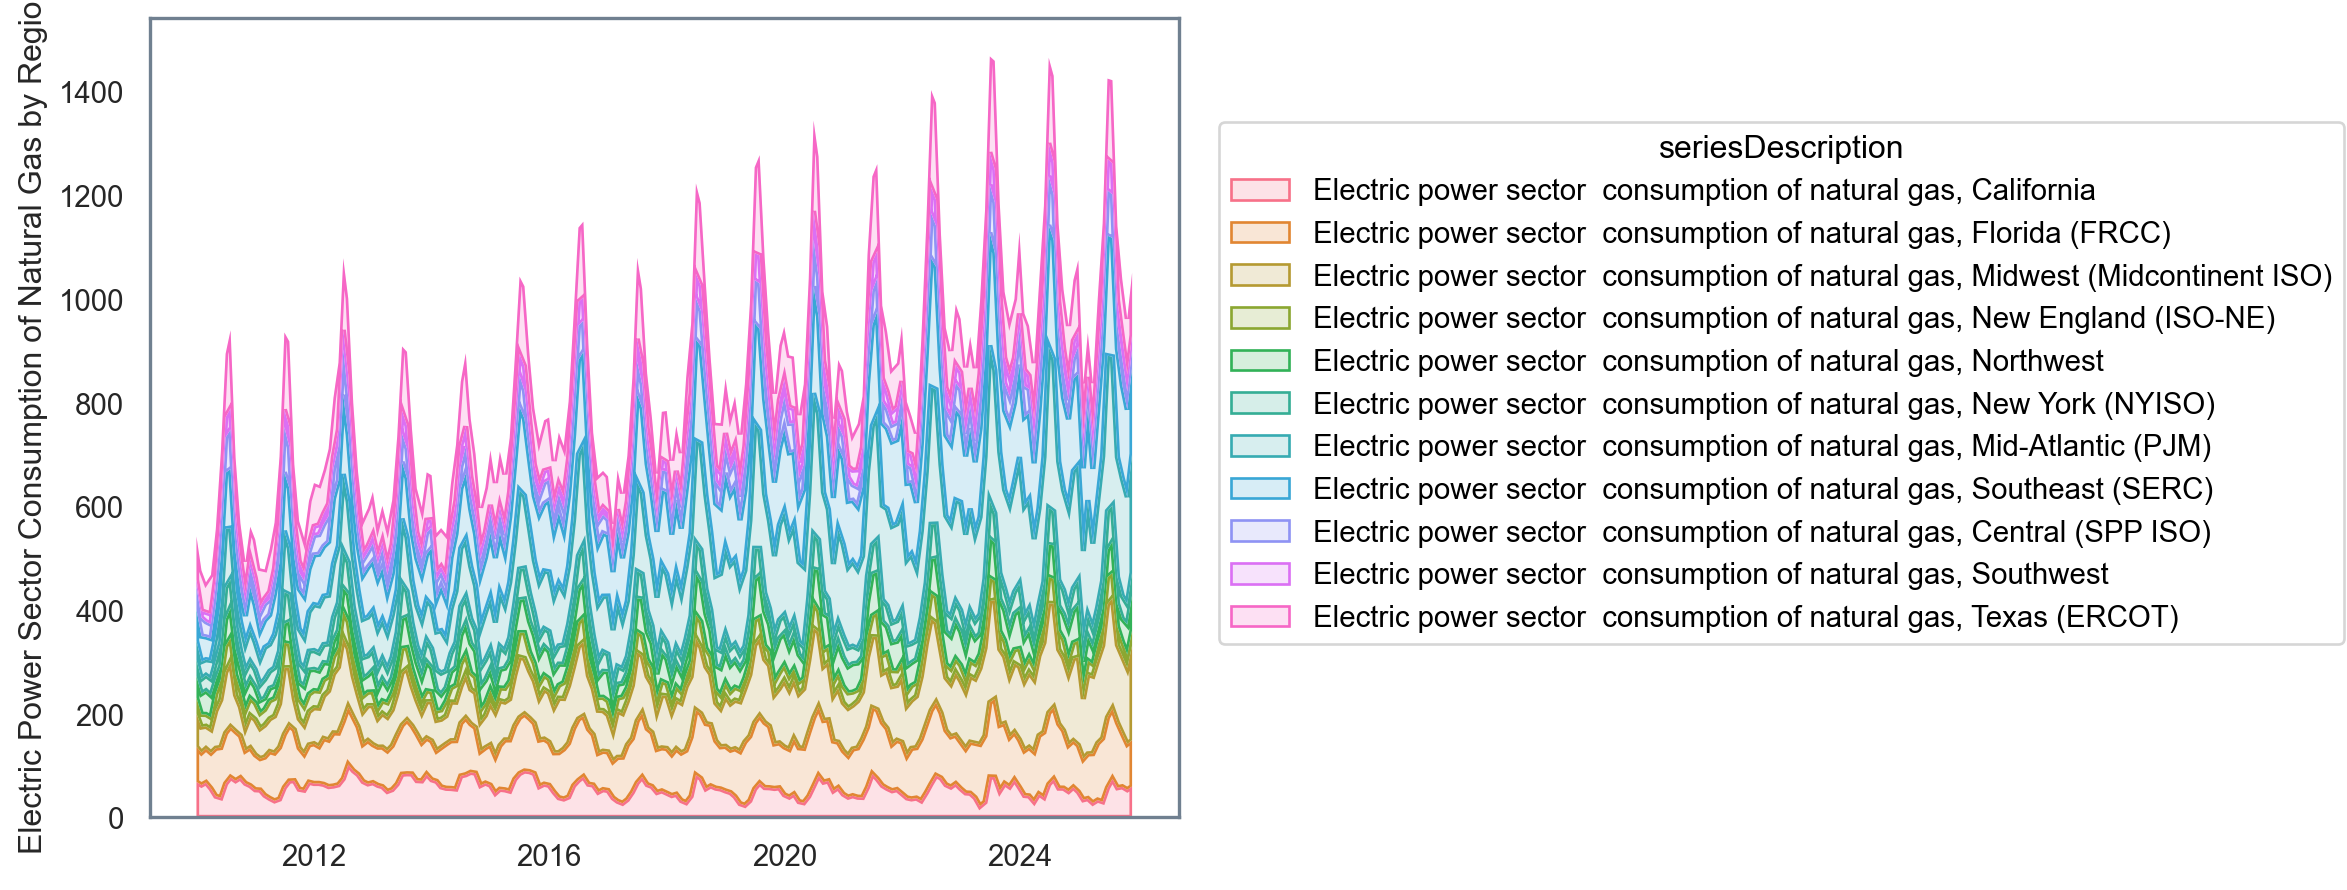

In [12]:
theme_dict = {**axes_style("white"), "axes.edgecolor":"slategray"}
so.Plot.config.theme.update(theme_dict)

# creating a stacked area chart
elecs_con_data = elec_cons_ng_df[elec_cons_ng_df['period'] >= '1/1/2010']

p = (
    so.Plot(elecs_con_data, x='period', y='value').add(so.Area(), so.Stack(), color='seriesDescription')
)

# Labels
p.label(x=None, y="Electric Power Sector Consumption of Natural Gas by Region")